In [ ]:
import requests
import re
import json

# B站视频抓取（单个视频）

## 定义视频页面网址

In [ ]:
url = 'https://www.bilibili.com/video/BV1bU4y1775K'

## 请求页面

In [3]:
res = requests.get(url)

## 解析

In [4]:
# 筛选出视频标题
title = re.findall('<title data-vue-meta="true">(.*?)</title>', res.text)[0]
title

'今天是袁隆平诞辰91周年，怀念…_哔哩哔哩_bilibili'

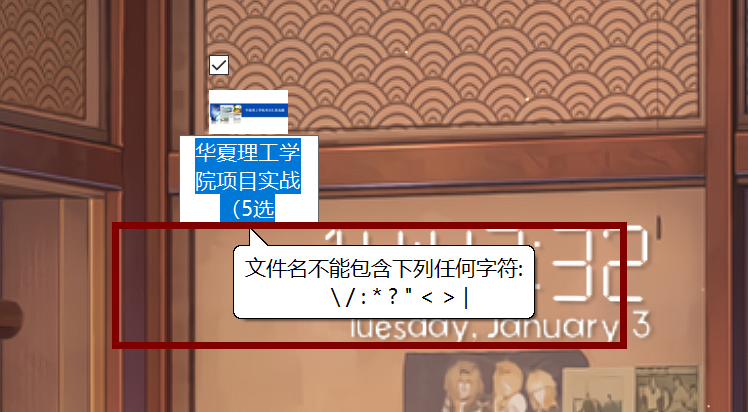

In [6]:
# 处理视频标题，使其符合windows中的文件命名规范
# 1. 删除后缀   _哔哩哔哩_bilibili
# 2. 文件名中不能包含下列字符  \/:*?"<>|
title = re.sub('[\\\\/:*?\"<>\|(_哔哩哔哩_bilibili) ]', '', title)
title

'今天是袁隆平诞辰91周年，怀念…'

In [7]:
# 将视频相关信息抓取下来
data = re.findall('<script>window.__playinfo__=(.*?)</script>', res.text)[0]
data = json.loads(data)
data['data']

{'from': 'local',
 'result': 'suee',
 'message': '',
 'quality': 32,
 'format': 'flv480',
 'timelength': 137365,
 'accept_format': 'flv720,flv480,mp4',
 'accept_description': ['高清 720P', '清晰 480P', '流畅 360P'],
 'accept_quality': [64, 32, 16],
 'video_codecid': 7,
 'seek_param': 'start',
 'seek_type': 'offset',
 'dash': {'duration': 138,
  'minBufferTime': 1.5,
  'min_buffer_time': 1.5,
  'video': [{'id': 32,
    'baseUrl': 'https://cn-hbyc-ct-02-06.bilivideo.com/upgcxcode/93/00/404120093/404120093_nb2-1-30032.m4s?e=ig8euxZM2rNcNbdlhoNvNC8BqJIzNbfqXBvEqxTEto8BTrNvN0GvT90W5JZMkX_YN0MvXg8gNEV4NC8xNEV4N03eN0B5tZlqNxTEto8BTrNvNeZVuJ10Kj_g2UB02J0mN0B5tZlqNCNEto8BTrNvNC7MTX502C8f2jmMQJ6mqF2fka1mqx6gqj0eN0B599M=&uipk=5&nbs=1&deadline=1672800331&gen=playurlv2&os=bcache&oi=0&trid=0000f8291bfb461f4b128e08361581e8646du&mid=0&platform=pc&upsig=a27d6752f85ff93af64beace9cc780f0&uparams=e,uipk,nbs,deadline,gen,os,oi,trid,mid,platform&cdnid=7274&bvc=vod&nettype=0&orderid=0,3&buvid=&build=0&agrr=0&bw=49

In [8]:
# 视频清晰度
data['data']['accept_description']

['高清 720P', '清晰 480P', '流畅 360P']

In [9]:
# 数据模块内容
data['data']['dash'].keys()

dict_keys(['duration', 'minBufferTime', 'min_buffer_time', 'video', 'audio', 'dolby', 'flac'])

In [10]:
# 获取一个视频地址
video_url = data['data']['dash']['video'][0]['baseUrl']
video_url

'https://cn-hbyc-ct-02-06.bilivideo.com/upgcxcode/93/00/404120093/404120093_nb2-1-30032.m4s?e=ig8euxZM2rNcNbdlhoNvNC8BqJIzNbfqXBvEqxTEto8BTrNvN0GvT90W5JZMkX_YN0MvXg8gNEV4NC8xNEV4N03eN0B5tZlqNxTEto8BTrNvNeZVuJ10Kj_g2UB02J0mN0B5tZlqNCNEto8BTrNvNC7MTX502C8f2jmMQJ6mqF2fka1mqx6gqj0eN0B599M=&uipk=5&nbs=1&deadline=1672800331&gen=playurlv2&os=bcache&oi=0&trid=0000f8291bfb461f4b128e08361581e8646du&mid=0&platform=pc&upsig=a27d6752f85ff93af64beace9cc780f0&uparams=e,uipk,nbs,deadline,gen,os,oi,trid,mid,platform&cdnid=7274&bvc=vod&nettype=0&orderid=0,3&buvid=&build=0&agrr=0&bw=49962&logo=80000000'

In [11]:
# 获取一个音频地址
audio_url = data['data']['dash']['audio'][0]['baseUrl']
audio_url

'https://cn-hbyc-ct-02-06.bilivideo.com/upgcxcode/93/00/404120093/404120093_nb2-1-30280.m4s?e=ig8euxZM2rNcNbdlhoNvNC8BqJIzNbfqXBvEqxTEto8BTrNvN0GvT90W5JZMkX_YN0MvXg8gNEV4NC8xNEV4N03eN0B5tZlqNxTEto8BTrNvNeZVuJ10Kj_g2UB02J0mN0B5tZlqNCNEto8BTrNvNC7MTX502C8f2jmMQJ6mqF2fka1mqx6gqj0eN0B599M=&uipk=5&nbs=1&deadline=1672800331&gen=playurlv2&os=bcache&oi=0&trid=0000f8291bfb461f4b128e08361581e8646du&mid=0&platform=pc&upsig=9ddf6de79d497c491dfdb6487c348c31&uparams=e,uipk,nbs,deadline,gen,os,oi,trid,mid,platform&cdnid=7274&bvc=vod&nettype=0&orderid=0,3&buvid=&build=0&agrr=0&bw=39999&logo=80000000'

## 抓取视频

In [12]:
res_v = requests.get(video_url, headers={'Accept-Encoding': ''})
res_v

<Response [403]>

有反爬措施

In [13]:
# 设置请求头
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Accept-Encoding': '',
    'cookie': "buvid3=5A46D2FE-026E-4327-AD38-CC3F92E271E9148792infoc; b_nut=1636378360; CURRENT_BLACKGAP=0; blackside_state=0; buvid4=6F9B3758-BD81-11D2-46BD-A1224D5B2ED190958-022020818-LAojlW5yV8aaDwVRBtT2YilBPIqLOxwQEG/2dVqeRScY7nriv22BDg%3D%3D; i-wanna-go-back=-1; nostalgia_conf=-1; LIVE_BUVID=AUTO6516474355098166; fingerprint=e7027a95d788028cccb408b79de2c6cb; buvid_fp_plain=undefined; DedeUserID=32636793; DedeUserID__ckMd5=622f1525d2637f75; buvid_fp=e7027a95d788028cccb408b79de2c6cb; b_ut=5; CURRENT_QUALITY=80; PVID=1; _uuid=E10C1089ED-FDCF-4BDE-B5EF-355213874B2441746infoc; rpdid=|(k)~YJll~mR0J'uYYmuulRYR; b_nut=100; SESSDATA=2f73a8f3%2C1688262504%2C3810f%2A12; bili_jct=fa333e4e93b1631d7fe8810ed5918215; sid=7twrpolo; is-2022-channel=1; CURRENT_FNVAL=4048; theme_style=light; innersign=1"
}

In [14]:
res_v = requests.get(video_url, headers=headers)
res_v

<Response [403]>

加了请求头还是访问失败

In [17]:
# 设置请求头，添加防盗链referer
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'referer': url
}

In [18]:
res_v = requests.get(video_url, headers=headers)
res_v

<Response [200]>

状态码为200，说明响应成功

In [16]:
# 存储视频
video_name = 'video.mp4'
with open(video_name, 'wb') as f:
    f.write(res_v.content)

## 抓取音频

In [17]:
res_a = requests.get(audio_url, headers=headers)
res_a

<Response [200]>

In [18]:
# 存储音频
audio_name = 'audio.mp4'
with open(audio_name, 'wb') as f:
    f.write(res_a.content)

## 合并音视频

In [19]:
import os

In [20]:
# 运行控制台代码
os.system(f'ffmpeg -i {audio_name} -i {video_name} -acodec copy -vcodec copy result/{video_name}')

0

## 代码封装

In [31]:
def get_bilibili_video(url, filepath=None):
    res = requests.get(url)
    
    # 筛选出视频标题
    title = re.findall('<title data-vue-meta="true">(.*?)</title>', res.text)[0]
    # 处理标题是的其符合windows文件命名规范
    title = re.sub('[\\\\/:*?\"<>\|(_哔哩哔哩_bilibili) ]', '', title)
    
    # 将视频相关信息抓取下来
    data = re.findall('<script>window.__playinfo__=(.*?)</script>', res.text)[0]
    data = json.loads(data)
    
    # 获取一个视频地址
    video_url = data['data']['dash']['video'][0]['baseUrl']
    # 获取一个音频地址
    audio_url = data['data']['dash']['audio'][0]['baseUrl']
    
    # 设置请求头，添加防盗链referer
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'referer': url
    }
    
    # 获取视频
    res_v = requests.get(video_url, headers=headers)
    
    # 获取音频
    res_a = requests.get(audio_url, headers=headers)
    
    # 存储视频
    video_name = 'tmp/' + title + '.mp4'
    with open(video_name, 'wb') as f:
        f.write(res_v.content)
        
     # 存储音频
    audio_name = 'tmp/' + title + '.mp3'
    with open(audio_name, 'wb') as f:
        f.write(res_a.content)
        
    # 合并音频和视频
    if filepath:
        flag = os.system(f'ffmpeg -i {audio_name} -i {video_name} -acodec copy -vcodec copy result/{filepath}/{title}.mp4')
    else:
        flag = os.system(f'ffmpeg -i {audio_name} -i {video_name} -acodec copy -vcodec copy result/{title}.mp4')
    if flag == 0:
        # 删除临时文件
        print(f'{title}.mp4合并成功')
        os.remove(video_name)
        os.remove(audio_name)
    else:
        print('合并失败，请联系开发人员处理！')

In [32]:
get_bilibili_video('https://www.bilibili.com/video/BV1V7411P7wL/?spm_id_from=333.337.search-card.all.click&vd_source=7f9e6b6e1c2f8486b2f6f3d6520c63fb')

tmp/【超实用】Python实现机器学习算法（全）.mp4抓取成功
tmp/【超实用】Python实现机器学习算法（全）.mp3抓取成功
【超实用】Python实现机器学习算法（全）.mp4合并成功
临时文件清除成功！


# B站视频抓取（视频全集）

如果直接使用之前的函数进行视频全集的抓取会出现以下几个问题：
1. 全部使用标题进行文件的命名会导致视频选集抓取到第二个时，前一个就会被覆盖
2. 所有视频全部存在在result中显得很杂乱

## 获取所有的视频选集名称

In [35]:
def main(url):
    res = requests.get(url)
    
    # 筛选出视频标题
    title = re.findall('<title data-vue-meta="true">(.*?)</title>', res.text)[0]
    # 处理标题是的其符合windows文件命名规范
    title = re.sub('[\\\\/:*?\"<>\|(_哔哩哔哩_bilibili) ]', '', title)
    
    if '视频选集' in res.text:
        print('该网页包含多个选集，爬取过程如下：')
        # 利用title，创建文件夹
        if not os.path.exists('result/' + title):
            os.mkdir('result/' + title)
        # 获取所有选集名称
        all_file_data = '{' + re.findall('"pages":\[.*?\]', res.text)[0] + '}'
        all_file = {i['page']: i['part'] for i in json.loads(all_file_data)['pages']}
        for p, filename in all_file.items():
            new_url = url + f'?p={p}'
            get_bilibili_video(new_url, filepath=title)
    else:
        print('该网页仅有单个视频！')
        get_bilibili_video(url)

In [ ]:
main('https://www.bilibili.com/video/BV1CY4y1F7Uw/?spm_id_from=333.337.search-card.all.click&vd_source=7f9e6b6e1c2f8486b2f6f3d6520c63fb')

# B站弹幕数据抓取

## 根据视频地址获取oid

### 定义视频地址

In [19]:
url = 'https://www.bilibili.com/video/BV1bU4y1775K/?vd_source=7f9e6b6e1c2f8486b2f6f3d6520c63fb'

### 发送请求

In [20]:
res = requests.get(url)

### 解析oid

In [21]:
import re

In [26]:
oid = re.findall('\"pages\":\[{\"cid\":(.*?),', res.text)[0]
oid

'404120093'

## 获取所有的包含弹幕的具体日期

### 获取视频发布日期

In [46]:
start_date = re.findall('<span title=\"(.*?)" class=\"pudate', res.text)[0][:7]
start_year, start_month = start_date.split('-')
start_year = int(start_year)
start_month = int(start_month)
print('Start Year:', start_year)
print('Start Month:', start_month)

Start Year: 2021
Start Month: 9


### 获取现在的时间

In [30]:
import time

In [45]:
end_year = time.gmtime().tm_year
end_month = time.gmtime().tm_mon
print('End Year:', end_year)
print('End Month:', end_month)

End Year: 2023
End Month: 1


### 计算自视频发布之日起，到现在所经过的所有月份

In [47]:
all_month = []
for year in range(start_year, end_year+1):
    # 当年份是起始年份时
    if year == start_year:
        for month in range(start_month, 13):
            if month < 10:
                all_month.append(str(year) + '-0' + str(month))
            else:
                all_month.append(str(year) + '-' + str(month))
    # 当年份是结束年份时
    elif year == end_year:
        for month in range(1, end_month+1):
            if month < 10:
                all_month.append(str(year) + '-0' + str(month))
            else:
                all_month.append(str(year) + '-' + str(month))
    # 当年份介于起始年份和结束年份之间时
    else:
        for month in range(1, 13):
            if month < 10:
                all_month.append(str(year) + '-0' + str(month))
            else:
                all_month.append(str(year) + '-' + str(month))

### 利用月份去获取每月包含弹幕的具体日期

In [57]:
all_date = []
for month in all_month:
    month_url = f'https://api.bilibili.com/x/v2/dm/history/index?month={month}&type=1&oid={oid}'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'cookie': "buvid3=5A46D2FE-026E-4327-AD38-CC3F92E271E9148792infoc; CURRENT_BLACKGAP=0; blackside_state=0; buvid4=6F9B3758-BD81-11D2-46BD-A1224D5B2ED190958-022020818-LAojlW5yV8aaDwVRBtT2YilBPIqLOxwQEG/2dVqeRScY7nriv22BDg%3D%3D; i-wanna-go-back=-1; nostalgia_conf=-1; LIVE_BUVID=AUTO6516474355098166; fingerprint=e7027a95d788028cccb408b79de2c6cb; buvid_fp_plain=undefined; DedeUserID=32636793; DedeUserID__ckMd5=622f1525d2637f75; buvid_fp=e7027a95d788028cccb408b79de2c6cb; b_ut=5; CURRENT_QUALITY=80; PVID=1; _uuid=E10C1089ED-FDCF-4BDE-B5EF-355213874B2441746infoc; rpdid=|(k)~YJll~mR0J'uYYmuulRYR; b_nut=100; SESSDATA=2f73a8f3%2C1688262504%2C3810f%2A12; bili_jct=fa333e4e93b1631d7fe8810ed5918215; is-2022-channel=1; CURRENT_FNVAL=4048; bp_video_offset_32636793=746615030222422000; sid=7lw2w8j9; innersign=1"
    }
    month_res = requests.get(month_url, headers=headers)
    tmp_date = month_res.json()['data']
    if tmp_date:
        all_date.extend(tmp_date)
        print(month + '存储成功！')
    else:
        print('***' + month + '没有弹幕！')

2021-09存储成功！
2021-10存储成功！
2021-11存储成功！
2021-12存储成功！
2022-01存储成功！
2022-02存储成功！
2022-03存储成功！
2022-04存储成功！
2022-05存储成功！
2022-06存储成功！
2022-07存储成功！
***2022-08没有弹幕！
2022-09存储成功！
2022-10存储成功！
2022-11存储成功！
2022-12存储成功！
***2023-01没有弹幕！


## 根据日期获取所有弹幕

In [68]:
all_dm = []
for date in all_date:
    dm_url = f'https://api.bilibili.com/x/v2/dm/web/history/seg.so?type=1&oid={oid}&date={date}'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'cookie': "buvid3=5A46D2FE-026E-4327-AD38-CC3F92E271E9148792infoc; CURRENT_BLACKGAP=0; blackside_state=0; buvid4=6F9B3758-BD81-11D2-46BD-A1224D5B2ED190958-022020818-LAojlW5yV8aaDwVRBtT2YilBPIqLOxwQEG/2dVqeRScY7nriv22BDg%3D%3D; i-wanna-go-back=-1; nostalgia_conf=-1; LIVE_BUVID=AUTO6516474355098166; fingerprint=e7027a95d788028cccb408b79de2c6cb; buvid_fp_plain=undefined; DedeUserID=32636793; DedeUserID__ckMd5=622f1525d2637f75; buvid_fp=e7027a95d788028cccb408b79de2c6cb; b_ut=5; CURRENT_QUALITY=80; PVID=1; _uuid=E10C1089ED-FDCF-4BDE-B5EF-355213874B2441746infoc; rpdid=|(k)~YJll~mR0J'uYYmuulRYR; b_nut=100; SESSDATA=2f73a8f3%2C1688262504%2C3810f%2A12; bili_jct=fa333e4e93b1631d7fe8810ed5918215; is-2022-channel=1; CURRENT_FNVAL=4048; bp_video_offset_32636793=746615030222422000; sid=7lw2w8j9; innersign=1"
    }
    dm_res = requests.get(dm_url, headers=headers)
    # 筛选中文
    tmp_text = re.findall('[\u4e00-\u9fa5]+', dm_res.text.replace(' ', ''))  # 匹配中文
    print(f'Date: {date}, DM_Num: {len(tmp_text)}')
    all_dm.extend(tmp_text)
    time.sleep(0.5)
print('*'*50)
print('Total DM_Num: ', len(all_dm))

Date: 2021-09-07, DM_Num: 591
Date: 2021-09-08, DM_Num: 589
Date: 2021-09-09, DM_Num: 582
Date: 2021-09-10, DM_Num: 573
Date: 2021-09-11, DM_Num: 618
Date: 2021-09-12, DM_Num: 604
Date: 2021-09-13, DM_Num: 596
Date: 2021-09-14, DM_Num: 615
Date: 2021-09-15, DM_Num: 634
Date: 2021-09-16, DM_Num: 635
Date: 2021-09-17, DM_Num: 628
Date: 2021-09-18, DM_Num: 618
Date: 2021-09-19, DM_Num: 623
Date: 2021-09-20, DM_Num: 617
Date: 2021-09-21, DM_Num: 623
Date: 2021-09-22, DM_Num: 616
Date: 2021-09-23, DM_Num: 631
Date: 2021-09-24, DM_Num: 648
Date: 2021-09-25, DM_Num: 654
Date: 2021-09-26, DM_Num: 653
Date: 2021-09-27, DM_Num: 659
Date: 2021-09-28, DM_Num: 659
Date: 2021-09-29, DM_Num: 636
Date: 2021-09-30, DM_Num: 603
Date: 2021-10-01, DM_Num: 594
Date: 2021-10-02, DM_Num: 601
Date: 2021-10-03, DM_Num: 594
Date: 2021-10-04, DM_Num: 592
Date: 2021-10-05, DM_Num: 590
Date: 2021-10-06, DM_Num: 590
Date: 2021-10-10, DM_Num: 590
Date: 2021-10-11, DM_Num: 594
Date: 2021-10-12, DM_Num: 595
Date: 2021

## 绘制词云图

### 分词

In [70]:
import jieba

In [80]:
all_cut = []
[all_cut.extend(jieba.lcut(i)) for i in all_dm]
all_cut

['生日快乐',
 '啊',
 '生日快乐',
 '生日快乐',
 '生日快乐',
 '爷爷',
 '致敬',
 '生日快乐',
 '致敬',
 '生日快乐',
 '吾辈',
 '当自强',
 '生日快乐',
 '我们',
 '记住',
 '了',
 '生日快乐',
 '致敬',
 '生日快乐',
 '袁',
 '爷爷',
 '生日快乐',
 '袁',
 '爷爷',
 '生日快乐',
 '袁老',
 '爷爷',
 '在',
 '那',
 '那边',
 '保佑',
 '我们',
 '袁老',
 '生日快乐',
 '袁',
 '爷爷',
 '生日快乐',
 '生日快乐',
 '廮',
 '生日快乐',
 '蠚',
 '袁',
 '爷爷',
 '生日快乐',
 '夐',
 '袁',
 '爷爷',
 '祝',
 '在',
 '天堂',
 '的',
 '您',
 '生日快乐',
 '袁',
 '爷爷',
 '生日快乐',
 '生日快乐',
 '袁',
 '爷爷',
 '生日快乐',
 '帅',
 '成真',
 '啦',
 '您',
 '快',
 '回来',
 '看看',
 '生日快乐',
 '袁老',
 '生日快乐',
 '生日快乐',
 '觴',
 '生日快乐',
 '袁老',
 '生日快乐',
 '呀',
 '爷爷',
 '致敬',
 '袁老',
 '生日快乐',
 '袁老',
 '生日快乐',
 '爷爷',
 '生日快乐',
 '国士无双',
 '生日快乐',
 '生日快乐',
 '生日快乐',
 '生日快乐',
 '袁',
 '爷爷',
 '生日快乐',
 '生日快乐',
 '袁',
 '爷爷',
 '致敬',
 '生日快乐',
 '永远',
 '记得',
 '您',
 '生日快乐',
 '致敬',
 '生日快乐',
 '爷爷',
 '缅怀',
 '袁',
 '爷爷',
 '您',
 '的',
 '嘱托',
 '我们',
 '记住',
 '了',
 '生日快乐',
 '致敬',
 '您',
 '生日快乐',
 '可爱',
 '生日快乐',
 '生日快乐',
 '生日快乐',
 '生日快乐',
 '致敬',
 '生日快乐',
 '生日快乐',
 '您',
 '的',
 '嘱托',
 '我们',
 '记住',
 '了',
 '帅',
 '天天',
 '都',
 '能',


### 去停用词

In [81]:
# 读取停用词典
with open('stoplist.txt', encoding='UTF-8') as f:
    stoplist = f.readlines()
stoplist = [i.strip() for i in stoplist]
stoplist

['\ufeff',
 '说',
 '人',
 '元',
 'hellip',
 '&',
 ',',
 '?',
 '、',
 '。',
 '"',
 '"',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '""',
 '的',
 '了',
 '人民',
 '末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎哟',
 '唉',
 '俺',
 '俺们',
 '按',
 '按照',
 '吧',
 '吧哒',
 '把',
 '罢了',
 '被',
 '本',
 '本着',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '边',
 '别',
 '别的',
 '别说',
 '并',
 '并且',
 '不比',
 '不成',
 '不单',
 '不但',
 '不独',
 '不管',
 '不光',
 '不过',
 '不仅',
 '不拘',
 '不论',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不问',
 '不只',
 '朝',
 '朝着',
 '趁',
 '趁着',
 '乘',
 '冲',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此间',
 '此外',
 '从',
 '从而',
 '打',
 '待',
 '但',
 '但是',
 '当',
 '当着',
 '到',
 '得',
 '的',
 '的话',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '对',
 '对于',
 '多',
 '多少',
 '而',
 '而况',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '尔后',
 '反过来',
 '反过来说',
 '反之',
 '非但',
 '非徒',
 '否则',
 '嘎',
 '嘎登',
 '该',
 '赶',
 '个',
 '各',
 '各个',
 '各位',
 '各种',
 '各自',
 '给',
 '根据',
 '跟',
 '故',
 '故此',
 '固然',
 '关于',
 '管',
 '归',
 '果然',
 '果真',
 '过',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何处',
 '何况',
 '何时',
 '嘿',
 '哼',
 '

In [83]:
all_word = [i for i in all_cut if i not in stoplist]

### 统计词频

In [85]:
from collections import Counter

In [86]:
all_counter = Counter(all_word)

### 训练并绘制词云图

In [88]:
from wordcloud import WordCloud

In [89]:
wc = WordCloud(font_path='simhei.ttf',  # 修改默认字体
              width=500,  # 设置词云图宽度
              height=500,  # 设置词云图高度
              background_color='#FFE793',  # 设置词云图背景色
              max_words=300 ,  # 设置最大显示的词语数量
              )

In [90]:
wc.fit_words(all_counter)

In [91]:
import matplotlib.pyplot as plt

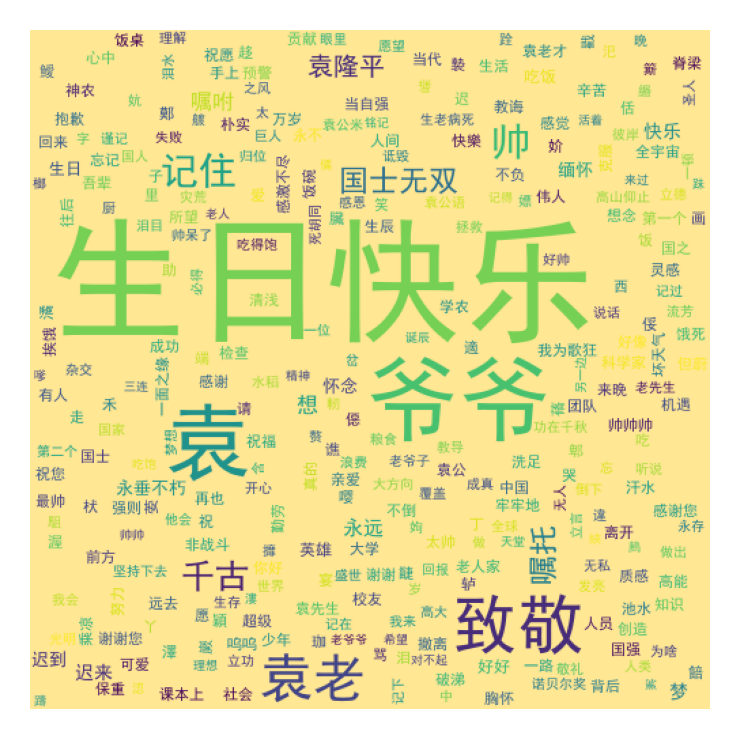

In [92]:
plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(wc)
plt.axis('off')
plt.show()